In [5]:
# Import the libraries.
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import yfinance as yf

### Define the variables

In [13]:
# Creating the portfolio for investigating.
tickers = ['RY', 'BAM', 'TRP', 'CP']

# Pick the wights of each stock (must add to 1)
weights = np.array([0.15, 0.4, 0.15, 0.30])

# Size of portfolio.
portfolio_value = 1_000

# Risk accepted from the confidence of results (98%).
confidence = 0.02

In [14]:
# Getting all the stock data from blue chips.
blue_chips = yf.download(tickers, start='2019-01-01', end='2022-07-31')["Close"]

[*********************100%***********************]  4 of 4 completed


### Determining the portfolio statistics.

In [15]:
# Getting the daily returns of each stock.
returns = blue_chips.pct_change()

# Getting the daily mean of each stock
mean_returns = returns.mean()

# Getting the portifolio mean.
port_mean = mean_returns.dot(weights)

# Getting mean of investment returns.
investment_mean = (1 + port_mean) * portfolio_value

# Compute portifolio covariance matrix.
cov_matrix = returns.cov()

# Getting standard variation.
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Standard deviation of investments returns.
investment_stdev = portfolio_value * port_stdev

### Computing Value at Risk

In [16]:
# ppf takes a percentage and returns a standard deviation 
# multiplier for what value that percentage occurs at.
# It is equivalent to a one-tail test on the density plot.
percent_point = norm.ppf(confidence, investment_mean, investment_stdev)

In [17]:
# calculate the VaR at the confidence interval
value_at_risk = portfolio_value - percent_point

# print it out
f"Portfolio VaR: {value_at_risk}"

'Portfolio VaR: 33.24516263077612'

In [18]:
# Multiply the one-day VaR by the square root of one (day) through the square root of 30 (days).
value_at_risks = value_at_risk * np.sqrt(range(1, 31))

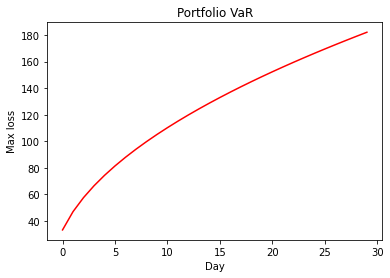

In [19]:
# Now, it's time to plot the results
# build plot of VaR over time
plt.xlabel("Day")
plt.ylabel("Max loss")
plt.title("Portfolio VaR")
plt.plot(value_at_risks, "r")